In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud



In [2]:
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']


In [3]:
df.head()

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         74682 non-null  int64
 1   Topic      74682 non-null  str  
 2   Sentiment  74682 non-null  str  
 3   Tweet      73824 non-null  str  
dtypes: int64(1), str(3)
memory usage: 2.3 MB


In [5]:
df['Sentiment'].value_counts()

Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [6]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

## Overall Sentiment Distribution

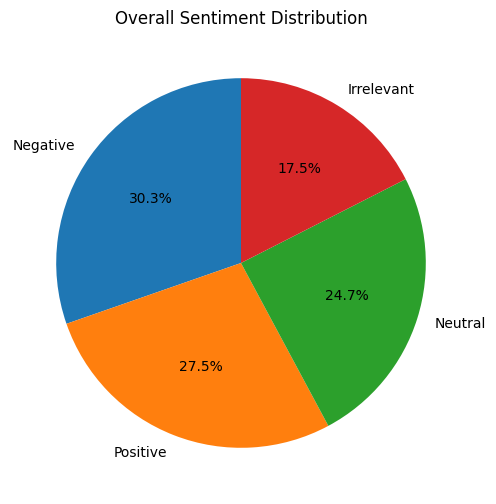

In [9]:
sentiment_count = df['Sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_count.values, 
        labels=sentiment_count.index, 
        autopct='%1.1f%%',
        startangle=90)
plt.title("Overall Sentiment Distribution")
plt.show()


## Stacked Sentiment Distribution

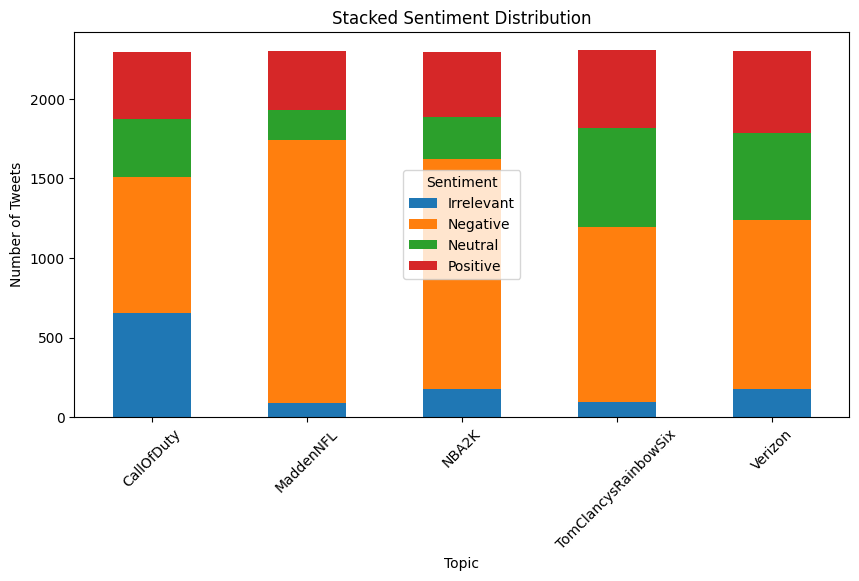

In [17]:
top_topics = df['Topic'].value_counts().head(5).index
filtered_df = df[df['Topic'].isin(top_topics)]

pivot_table = pd.crosstab(filtered_df['Topic'], filtered_df['Sentiment'])

pivot_table.plot(kind='bar', stacked=True, figsize=(10,5))

plt.title("Stacked Sentiment Distribution")
plt.xlabel("Topic")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.show()


## Sentiment Distribution of Tweets

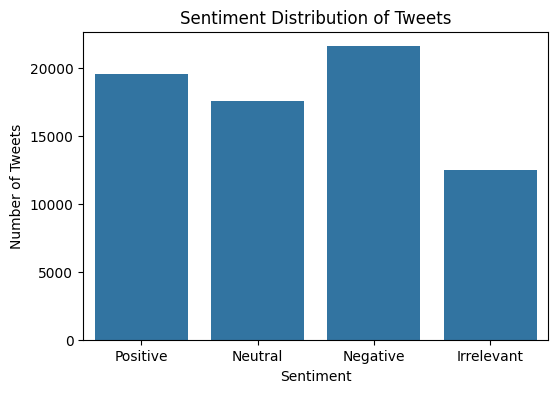

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df)

plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()